<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect9. Deep Neural Networks

In [1]:
from images import bigpycraft_copy as bpc

### <font color='blue'>Biological Neuron</font>
> 
The Navy revealed the embryo of an eletronic computer today that it expects will be able to walk, talk, see, write, reproduce itself an be conscious of its existence... Dr. Frank Rosenblatt
<br>[The New York Times, July 08, 1958]

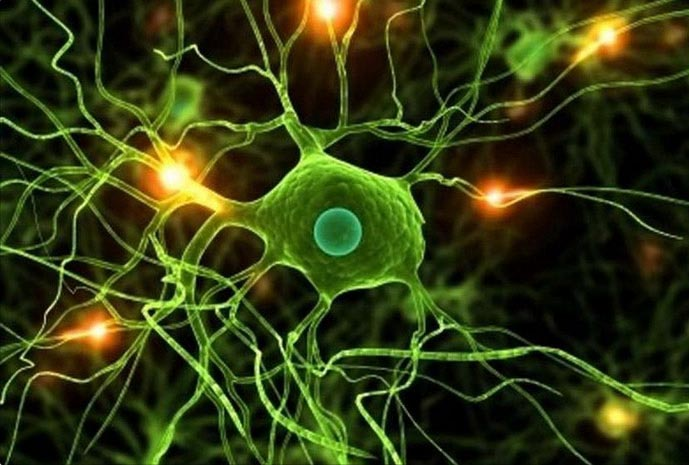

In [2]:
# Neuron
bpc.Figure(bpc.ML09_IMG_01)

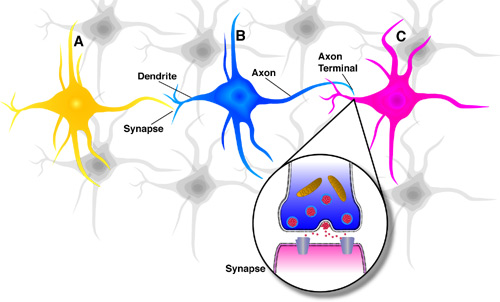

In [3]:
# 뉴런들간의 연결구조
bpc.Figure(bpc.ML09_IMG_02)

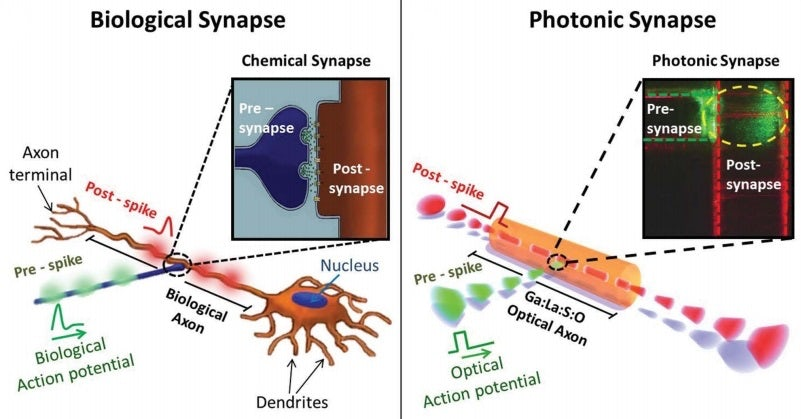

In [4]:
# Synapse
bpc.Figure(bpc.ML09_IMG_03)

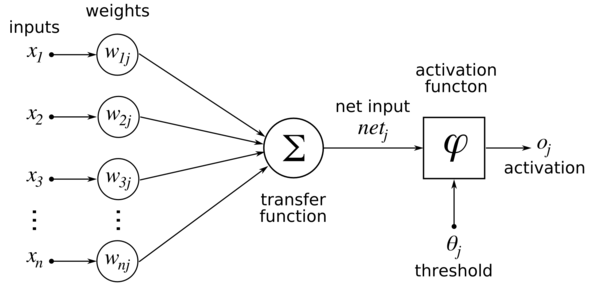

In [5]:
# Activation Functions
bpc.Figure(bpc.ML09_IMG_06)

### <font color='blue'>Neural Networks 구현에 대한 도전과 난관</font>
> 
- 뇌는 아주 복잡한 구조로 되어 있지만, 연결간의 동작이 아주 단순하여 로지컬 유닛들간의 결합으로 해결할 수 있다고 생각하였다.
<br> - 연결시 활성화되고, 연결이 끊어지면 비활성화 ==> AND, OR 유닛
- 초기 Neural Networks 연구시에 절망감을 주었던 문제
<br> - 하나의 로지스틱 리그레션 유닛으로 XOR 문제를 풀 수 없다.
<br> - 하지만, 여러개의 로지스틱 리그레션 유닛을 풀 수 있지만, 여러개의 weight, bias를 어떻게 학습시킬것인가? 


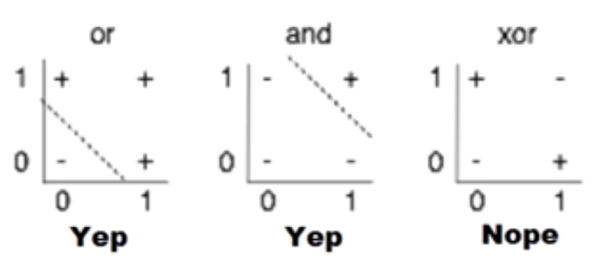

In [6]:
# XOR Problem : Linearly Separable?
bpc.Figure(bpc.ML09_IMG_11)

### 1. xor.py
> XOR with logistic regression? 
- One logistic regression unit cannot separate XOR
- Multiple logistic regression units : training many weight, many bias
<br><br>$$H(X) = \frac{1}{1 + e^-W^TX} $$
<br><br>$$cost(W) = -\frac{1}{m} \sum y log(H(x)) + (1-y)(log(1 - H(x)) $$
<br><br>$$W := W - α \frac{σ}{σW} cost(W) $$

In [7]:
# XOR, This example does not work
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function   cf.Sigmoid
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [8]:
sess = tf.Session()
# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in range(10001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run(W): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run(W)
            ))



step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.8759795427322388, 
sess.run(W): 
[[ 0.78635669]
 [ 0.66282612]]

step: 1000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.693149209022522, 
sess.run(W): 
[[ 0.00566577]
 [ 0.00542595]]

step: 2000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6931471824645996, 
sess.run(W): 
[[ 0.00010906]
 [ 0.00010861]]

step: 3000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6931471824645996, 
sess.run(W): 
[[  2.13105750e-06]
 [  2.13211524e-06]]

step: 4000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6931471824645996, 
sess.run(W): 
[[  1.32805582e-07]
 [  1.33863324e-07]]

step: 5000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6931471824645996, 
sess.run(W): 
[[  1.32805582e-07]
 [  1.33863324e-07]]

step: 6000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6931471824645996, 
sess.run(W): 
[[  1.32805582e-07]
 [  1.33863324e-07]]

step: 7000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data])

In [9]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]] 

Correct: 
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] 

Accuracy: 0.5


# <div align='center'><font color='#CC0000'> It does Not work. ㅠㅠ

### 2. xor-nn.py
> Neural Network (NN) 
- "No one on earth had found a viable way to train* " by Marvin Minsky
- XOR using NN
- http://cs231n.github.io/convolutional-networks/ 

### <font color='blue'>Perceptrons</font>
> By Marvin Minsky, founder of the MIT AI lab
- We need to use MLP, multilayer perceptrons (Multilayer neural nets)
- No one on earth had found a viable way to train MLPs good enough to learn such simple functions.

# A regular 3-layer Neural Network.


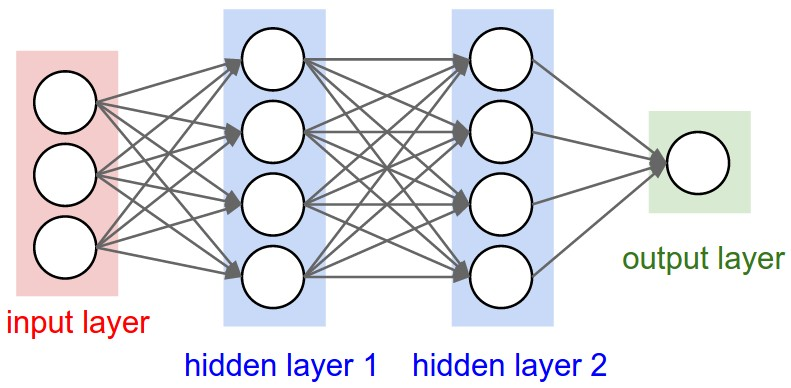

In [10]:
text = '# A regular 3-layer Neural Network.'
print(text)
bpc.Figure(bpc.ML09_IMG_12)

# A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers.


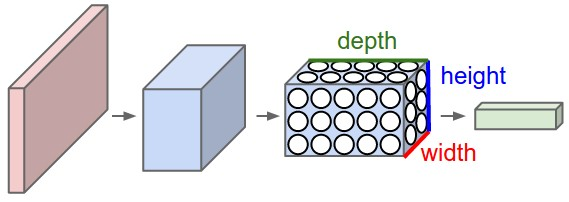

In [11]:
text = '# A ConvNet arranges its neurons in three dimensions (width, height, depth), as visualized in one of the layers.'
print(text)
bpc.Figure(bpc.ML09_IMG_13)

Every layer of a ConvNet transforms the 3D input volume to a 3D output volume of neuron activations. In this example, the red input layer holds the image, so its width and height would be the dimensions of the image, and the depth would be 3 (Red, Green, Blue channels).
<br>
<hr>

In [12]:
# XOR using NN
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [13]:
sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in range(10001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run([W1, W2]): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run([W1, W2])
            ))



step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 1.2737582921981812, 
sess.run([W1, W2]): 
[array([[ 2.13551426, -0.0782264 ],
       [ 0.04496152, -0.48487958]], dtype=float32), array([[-0.69574881],
       [-1.32445216]], dtype=float32)]

step: 1000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6907818913459778, 
sess.run([W1, W2]): 
[array([[ 2.07601237, -0.59124708],
       [ 0.04525172, -0.81890213]], dtype=float32), array([[-0.0963316 ],
       [-0.63915539]], dtype=float32)]

step: 2000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.6554960608482361, 
sess.run([W1, W2]): 
[array([[ 2.07273817, -1.68272102],
       [ 0.19714457, -1.69658661]], dtype=float32), array([[-0.34937105],
       [-1.57771969]], dtype=float32)]

step: 3000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.47863656282424927, 
sess.run([W1, W2]): 
[array([[ 2.05441833, -3.61322546],
       [ 1.04345655, -3.44859838]], dtype=float32), array([[-1.70560002],
       [-3.87330294]], dt

In [14]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[ 0.01368036]
 [ 0.98169047]
 [ 0.98173428]
 [ 0.01679076]] 

Correct: 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]] 

Accuracy: 1.0


# <div align='center'><font color='0000CC'> It work Well !! ^^

### 3. xor-nn-wide-deep.py
> Wide & Deep NN for XOR

In [15]:
# XOR-NN-Wide-Deep
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b4 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [16]:
sess = tf.Session()

# Initialize TensorFlow variables
sess.run(tf.global_variables_initializer())

for step in range(10001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 1000 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
        print("\nstep: {step}, \nsess.run(cost, feed_dict[X: x_data, Y: y_data]): {run_cost}, \nsess.run([W1, W2]): \n{run_weight}".format(
                step = step, 
                run_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
                run_weight = sess.run([W1, W2])
            ))



step: 0, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 1.5568960905075073, 
sess.run([W1, W2]): 
[array([[-0.60164016,  0.89192021,  0.35191226,  0.56761146, -0.99739665,
         0.32676136, -0.0275667 , -0.74284959, -0.95138216, -2.95208597],
       [ 2.14195418,  1.17518973,  0.3820754 , -1.32208002, -0.01911528,
         0.16187686, -3.04041839,  0.2068328 ,  0.36814651, -1.59220243]], dtype=float32), array([[-0.82702488, -0.59083807, -0.91529149, -1.63873768, -0.39875317,
        -0.07010718, -0.62081033, -1.49444103,  0.23517574, -0.91442388],
       [-0.7995736 ,  1.64319766,  0.71563548,  1.86648691, -0.38515177,
         0.40816587, -0.61722082, -0.09925716,  0.27343321, -1.28574586],
       [-0.08891804,  0.20978071, -0.95120919,  0.33139288, -2.07858539,
        -0.48373953,  1.28179991,  0.48855504,  0.47712448,  0.98934746],
       [ 1.07697999,  1.2265451 , -0.79649937, -0.08373559, -0.36422762,
        -0.32580382, -0.06039998,  2.44203186,  0.18790258,  0.51402962]


step: 5000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.004114406183362007, 
sess.run([W1, W2]): 
[array([[-2.13921547,  0.38450706,  1.19142878,  2.97095323, -1.43902206,
         0.85705888, -0.42365935, -2.1464026 , -0.87071687, -4.54305935],
       [ 4.18192244,  2.17584181,  0.84332055, -2.21342325,  0.0253892 ,
         1.14699054, -3.02944827,  0.26470277,  0.12419119, -4.34254837]], dtype=float32), array([[ -2.43437743e+00,  -6.39513552e-01,  -8.94064546e-01,
         -2.03757763e+00,  -8.58750939e-01,  -1.08680224e+00,
         -9.32474017e-01,  -1.68852842e+00,   2.41930580e+00,
         -2.56776541e-01],
       [ -1.24309611e+00,   1.66035354e+00,   7.10063159e-01,
          1.89283013e+00,  -3.77711892e-01,  -6.93101808e-03,
         -7.93482959e-01,  -2.20838964e-01,   1.00259936e+00,
         -8.33047688e-01],
       [ -4.71431613e-02,   1.57664746e-01,  -9.57229733e-01,
         -1.05369888e-01,  -2.04938960e+00,  -9.51687336e-01,
          1.17807901e+00,   4.9


step: 9000, 
sess.run(cost, feed_dict[X: x_data, Y: y_data]): 0.0015432978980243206, 
sess.run([W1, W2]): 
[array([[-2.29056239,  0.31264737,  1.22614133,  3.1293242 , -1.46592116,
         0.91823834, -0.42628199, -2.20626259, -0.86725616, -4.62897491],
       [ 4.33009529,  2.18588758,  0.89139849, -2.30195403,  0.02352407,
         1.18066049, -3.02944827,  0.28998795,  0.13267253, -4.4322052 ]], dtype=float32), array([[-2.55309558, -0.6489104 , -0.88989729, -2.13823247, -0.90954399,
        -1.16750455, -0.95696372, -1.69765198,  2.56977439, -0.23532628],
       [-1.29390478,  1.65485132,  0.71306372,  1.83359849, -0.38305888,
        -0.02651243, -0.80385345, -0.22813438,  1.02868307, -0.82782179],
       [-0.05732891,  0.15646861, -0.95612508, -0.16973488, -2.06284165,
        -0.97070229,  1.16646385,  0.4997533 ,  1.32392371,  1.5018481 ],
       [ 1.99817145,  1.0460223 , -0.80731893, -1.59167635, -0.34746817,
        -1.11232162, -0.11350188,  2.67674088,  1.70879197,  1.289

In [17]:
# Accuracy report
h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict={X: x_data, Y: y_data})
# print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


Hypothesis: 
[[  9.67103057e-04]
 [  9.98773754e-01]
 [  9.98768389e-01]
 [  1.86780957e-03]] 

Correct: 
[[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]] 

Accuracy: 1.0


In [18]:
# TensorBoard : TF logging/debuging tool

### 4. xor-tensorboard.py
> TensorBoard : TF logging/debuging tool   
- Visualize your TF graph
- Plot quantitative metrics
- Show additional data

![Graph](./images/lab09_tensorboard.png)

In [19]:
# XOR-NN-Wide-Deep
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    w1_hist = tf.summary.histogram("weights1", W1)
    b1_hist = tf.summary.histogram("biases1", b1)
    layer1_hist = tf.summary.histogram("layer1", layer1)


with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    w2_hist = tf.summary.histogram("weights2", W2)
    b2_hist = tf.summary.histogram("biases2", b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                           tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./graph/logs/xor_logs")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={
                  X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: \n{h} \n\nCorrect: \n{c} \n\nAccuracy: {a}".format(
        h=h, c=c, a=a
    ))


0 0.747197 [array([[-0.75784916,  2.09008622],
       [ 0.28375602,  1.77434921]], dtype=float32), array([[-0.19245267],
       [ 1.04768288]], dtype=float32)]
100 0.698273 [array([[-0.75266361,  2.09470201],
       [ 0.29037261,  1.78186619]], dtype=float32), array([[-0.30330837],
       [ 0.94803041]], dtype=float32)]
200 0.67932 [array([[-0.74787468,  2.10080886],
       [ 0.29744324,  1.79117393]], dtype=float32), array([[-0.37419888],
       [ 0.89379048]], dtype=float32)]
300 0.672037 [array([[-0.74400288,  2.10779166],
       [ 0.30425689,  1.8015151 ]], dtype=float32), array([[-0.41955319],
       [ 0.86854106]], dtype=float32)]
400 0.669008 [array([[-0.74093062,  2.11531615],
       [ 0.31074452,  1.81249356]], dtype=float32), array([[-0.44932142],
       [ 0.86098588]], dtype=float32)]
500 0.667479 [array([[-0.73841894,  2.12320781],
       [ 0.31700346,  1.82390559]], dtype=float32), array([[-0.46976921],
       [ 0.86403364]], dtype=float32)]
600 0.66647 [array([[-0.7362650

5100 0.622302 [array([[-0.66586196,  2.62823677],
       [ 0.69300735,  2.50690818]], dtype=float32), array([[-0.87466121],
       [ 1.74466193]], dtype=float32)]
5200 0.6211 [array([[-0.66506463,  2.64134002],
       [ 0.70355976,  2.52375197]], dtype=float32), array([[-0.88474292],
       [ 1.76542044]], dtype=float32)]
5300 0.619891 [array([[-0.66433603,  2.65450144],
       [ 0.71420622,  2.54063964]], dtype=float32), array([[-0.89489818],
       [ 1.78620291]], dtype=float32)]
5400 0.618675 [array([[-0.66367841,  2.66771889],
       [ 0.7249462 ,  2.55756736]], dtype=float32), array([[-0.90512657],
       [ 1.80700648]], dtype=float32)]
5500 0.617453 [array([[-0.66309428,  2.68099189],
       [ 0.73577923,  2.57453251]], dtype=float32), array([[-0.9154278 ],
       [ 1.82782793]], dtype=float32)]
5600 0.616224 [array([[-0.66258538,  2.69431639],
       [ 0.74670464,  2.59153628]], dtype=float32), array([[-0.92580163],
       [ 1.84866655]], dtype=float32)]
5700 0.614989 [array([[-

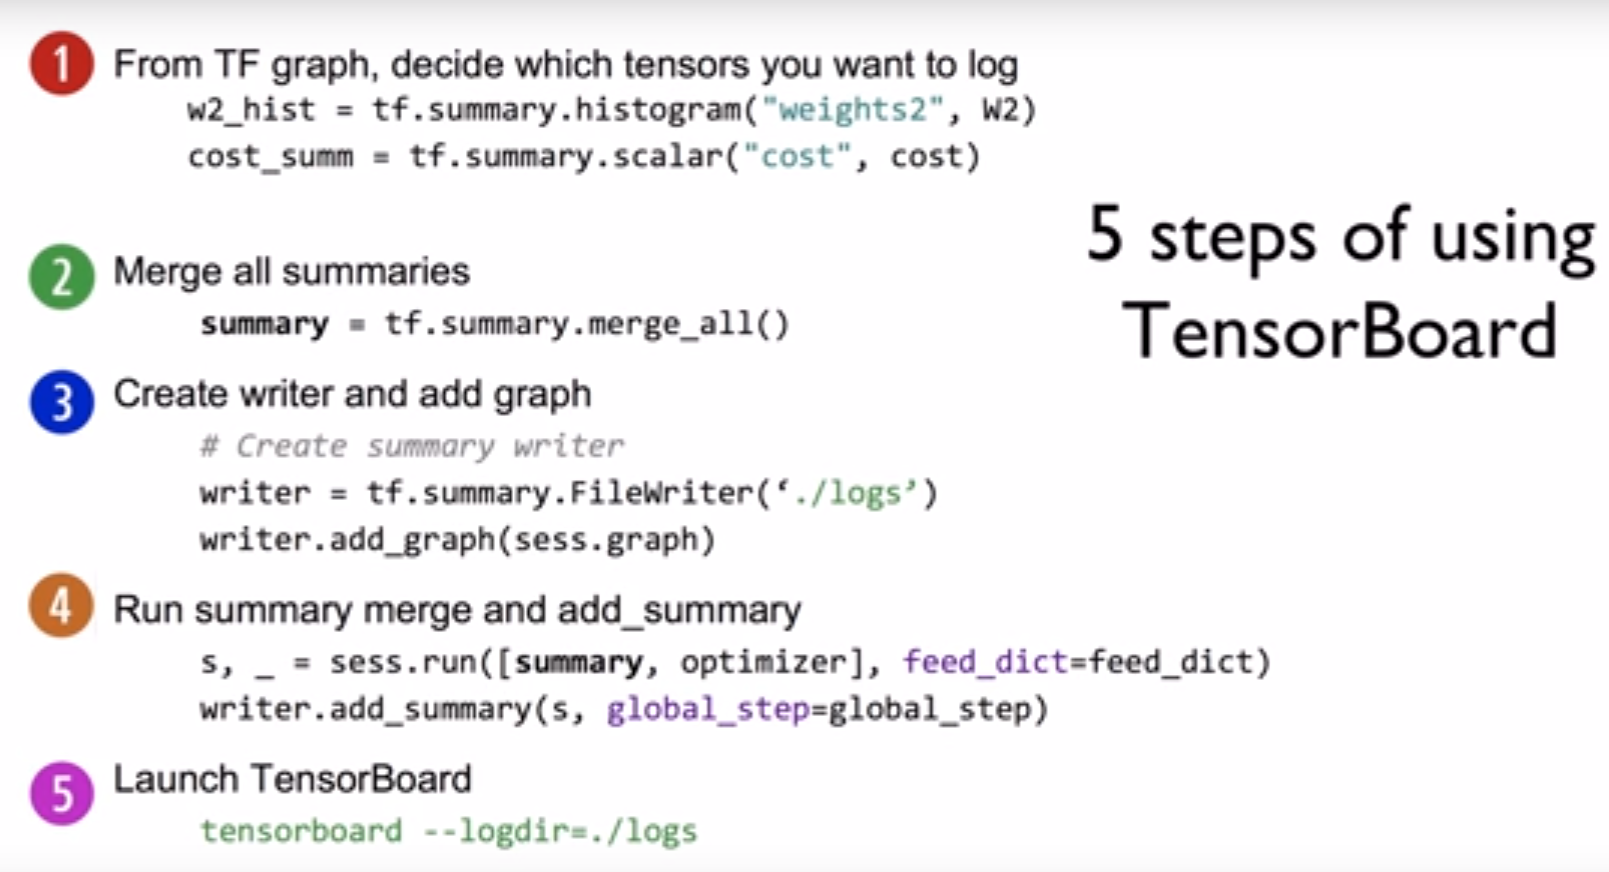

In [20]:
# Tensorboard
bpc.Figure(bpc.ML09_IMG_20, 800)

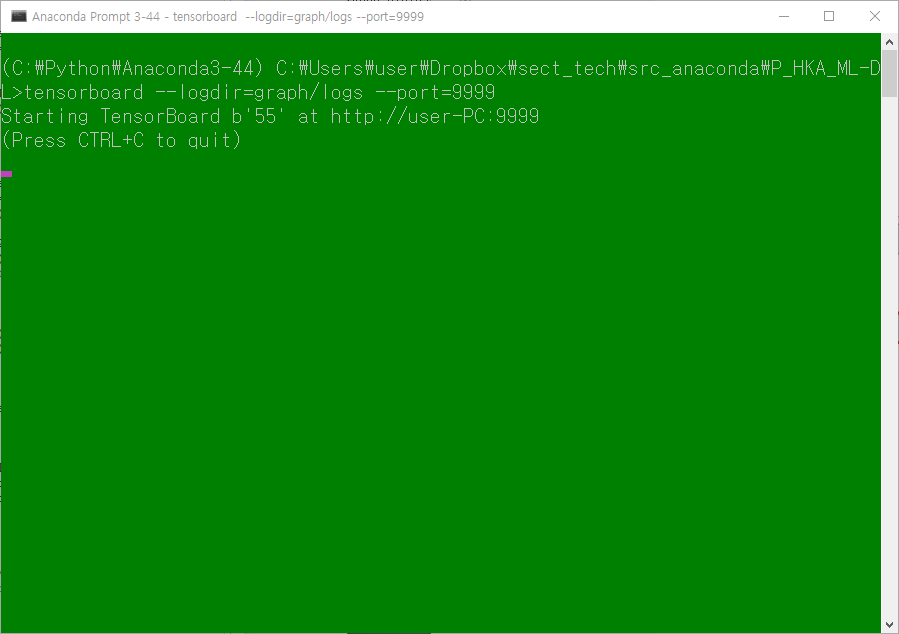

In [21]:
bpc.Figure(bpc.ML09_IMG_21)

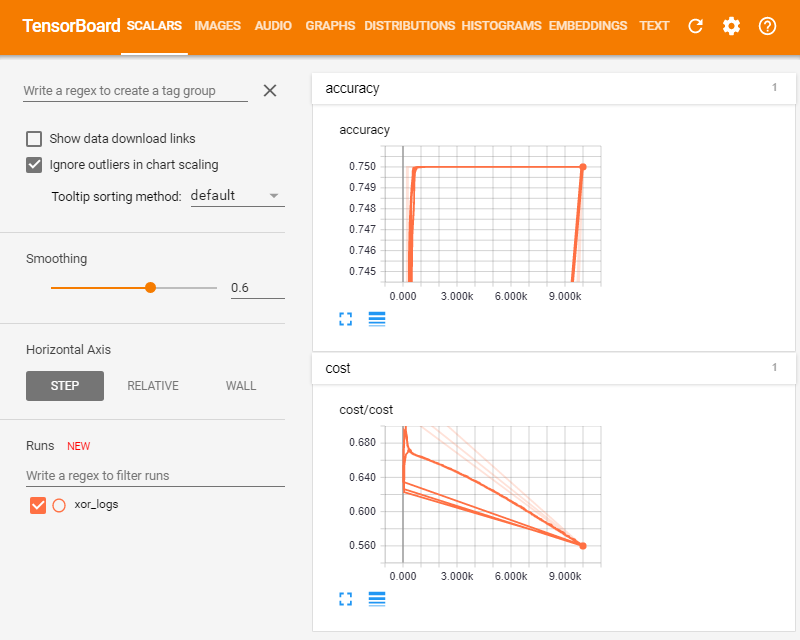

In [22]:
bpc.Figure(bpc.ML09_IMG_22)

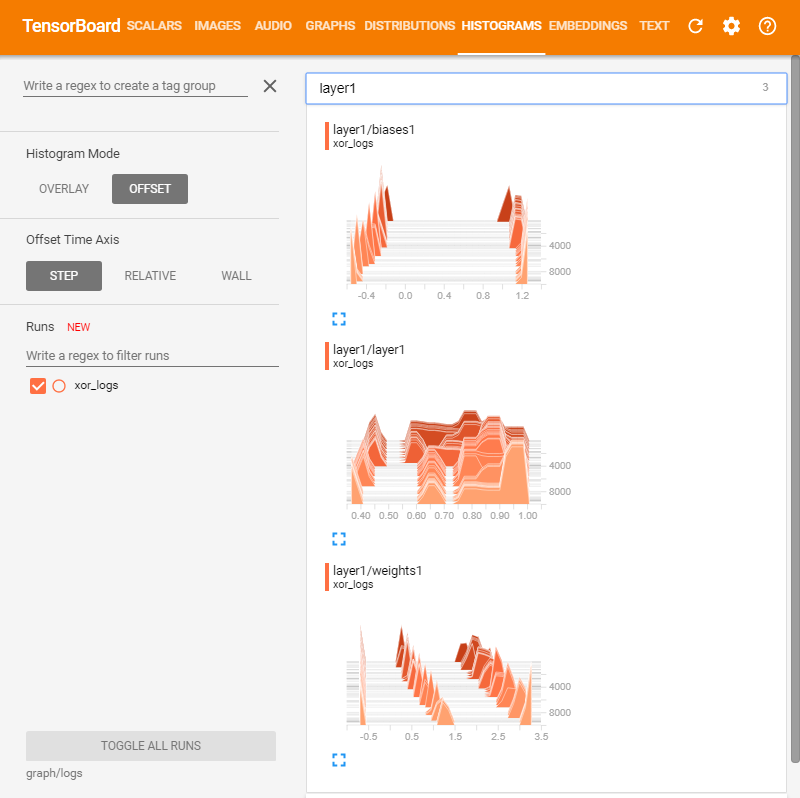

In [23]:
bpc.Figure(bpc.ML09_IMG_23)

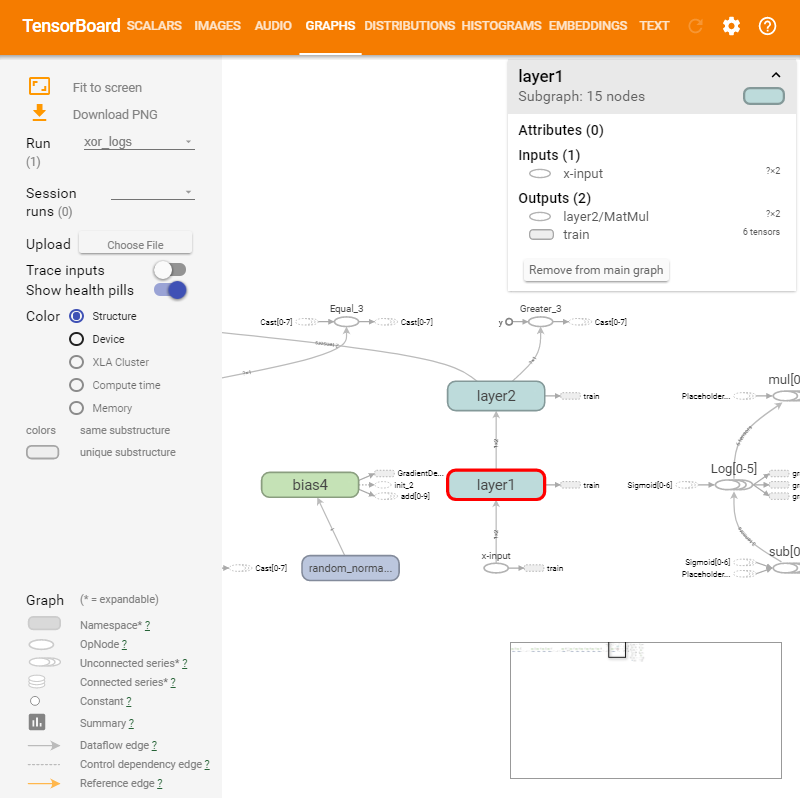

In [24]:
bpc.Figure(bpc.ML09_IMG_24)

### 5. linear_back_prop.py
> Backpropagation
- http://blog.aloni.org/posts/backprop-with-tensorflow/
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
- WIP

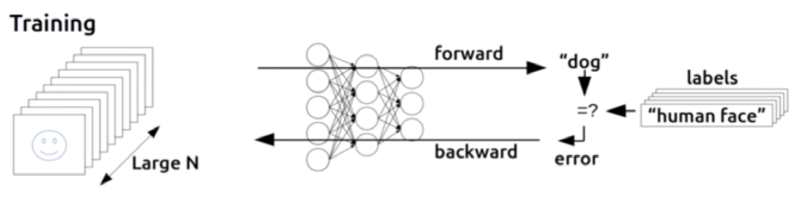

In [25]:
# Backpropagation
bpc.Figure(bpc.ML09_IMG_15)

In [26]:
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[1.], [2.], [3.]]
y_data = [[1.], [2.], [3.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print("X\t: {X}, \nW\t: {W}, \nd_l1\t: {d_l1}, \nd_w\t: {d_w}".format(
    X = X, 
    W = W, 
    d_l1 = d_l1, 
    d_w  = d_w
    ))

# Updating network using gradients
learning_rate = 0.1
step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))


X	: Tensor("Placeholder_6:0", shape=(?, 1), dtype=float32), 
W	: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32_ref>, 
d_l1	: Tensor("sub_6:0", shape=(?, 1), dtype=float32), 
d_w	: Tensor("MatMul_8:0", shape=(1, 1), dtype=float32)


In [27]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

# for step in range(1001):
#     # RMSE = reduce_mean_square
#     rmse = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
#     print("step: {s} \t RMSE: {r}".format(
#         s=step, 
#         r=rmse
#     ))

# RMSE = reduce_mean_square
for i in range(1001):
    print("{i} \t: {r}".format( 
        i = i, 
        r = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
    ))


0 	: [[array([[-1.35268641]], dtype=float32), 4.823657], 4.8555865]
1 	: [[array([[-0.95311964]], dtype=float32), 4.8118286], 3.7040799]
2 	: [[array([[-1.10584939]], dtype=float32), 4.7212696], 3.3632095]
3 	: [[array([[-0.99042201]], dtype=float32), 4.6703124], 3.2160637]
4 	: [[array([[-1.00601864]], dtype=float32), 4.6013656], 3.1165533]
5 	: [[array([[-0.95841187]], dtype=float32), 4.5424328], 3.0300484]
6 	: [[array([[-0.94209492]], dtype=float32), 4.4798717], 2.9483044]
7 	: [[array([[-0.91108507]], dtype=float32), 4.4203033], 2.8693256]
8 	: [[array([[-0.88774794]], dtype=float32), 4.3604898], 2.792594]
9 	: [[array([[-0.86119473]], dtype=float32), 4.3019905], 2.7179461]
10 	: [[array([[-0.83671641]], dtype=float32), 4.2440305], 2.6453016]
11 	: [[array([[-0.8117317]], dtype=float32), 4.1869707], 2.5745995]
12 	: [[array([[-0.78748977]], dtype=float32), 4.13062], 2.5057881]
13 	: [[array([[-0.76337612]], dtype=float32), 4.0750561], 2.4388158]
14 	: [[array([[-0.73968321]], dtyp

207 	: [[array([[ 0.87261641]], dtype=float32), 0.29437211], 0.012726421]
208 	: [[array([[ 0.87433016]], dtype=float32), 0.29041162], 0.01238626]
209 	: [[array([[ 0.87602091]], dtype=float32), 0.28650442], 0.01205521]
210 	: [[array([[ 0.87768894]], dtype=float32), 0.28264979], 0.011733017]
211 	: [[array([[ 0.87933451]], dtype=float32), 0.27884701], 0.011419438]
212 	: [[array([[ 0.88095796]], dtype=float32), 0.2750954], 0.011114229]
213 	: [[array([[ 0.8825596]], dtype=float32), 0.27139428], 0.010817175]
214 	: [[array([[ 0.88413954]], dtype=float32), 0.26774293], 0.010528069]
215 	: [[array([[ 0.88569844]], dtype=float32), 0.26414073], 0.010246678]
216 	: [[array([[ 0.88723618]], dtype=float32), 0.26058695], 0.0099728219]
217 	: [[array([[ 0.88875335]], dtype=float32), 0.25708103], 0.0097062653]
218 	: [[array([[ 0.89025003]], dtype=float32), 0.25362226], 0.0094468677]
219 	: [[array([[ 0.89172661]], dtype=float32), 0.25021005], 0.0091943601]
220 	: [[array([[ 0.89318329]], dtype=

368 	: [[array([[ 0.98561186]], dtype=float32), 0.033249691], 0.00016236441]
369 	: [[array([[ 0.98580545]], dtype=float32), 0.032802355], 0.00015802462]
370 	: [[array([[ 0.98599643]], dtype=float32), 0.032361027], 0.00015380169]
371 	: [[array([[ 0.98618484]], dtype=float32), 0.031925648], 0.00014968899]
372 	: [[array([[ 0.98637068]], dtype=float32), 0.031496115], 0.00014568921]
373 	: [[array([[ 0.98655403]], dtype=float32), 0.031072365], 0.0001417952]
374 	: [[array([[ 0.98673499]], dtype=float32), 0.030654326], 0.00013800622]
375 	: [[array([[ 0.98691332]], dtype=float32), 0.030241886], 0.00013431565]
376 	: [[array([[ 0.98708946]], dtype=float32), 0.029835025], 0.0001307256]
377 	: [[array([[ 0.9872632]], dtype=float32), 0.029433627], 0.00012723343]
378 	: [[array([[ 0.98743451]], dtype=float32), 0.029037617], 0.000123832]
379 	: [[array([[ 0.98760355]], dtype=float32), 0.028646944], 0.0001205216]
380 	: [[array([[ 0.98777044]], dtype=float32), 0.028261544], 0.00011730234]
381 	

505 	: [[array([[ 0.99775052]], dtype=float32), 0.0051983064], 3.9685897e-06]
506 	: [[array([[ 0.99778086]], dtype=float32), 0.0051283743], 3.8626672e-06]
507 	: [[array([[ 0.99781066]], dtype=float32), 0.005059368], 3.7590664e-06]
508 	: [[array([[ 0.99784005]], dtype=float32), 0.0049912916], 3.6587342e-06]
509 	: [[array([[ 0.99786919]], dtype=float32), 0.0049241488], 3.5609071e-06]
510 	: [[array([[ 0.99789786]], dtype=float32), 0.0048579001], 3.4659477e-06]
511 	: [[array([[ 0.99792606]], dtype=float32), 0.0047925296], 3.3731474e-06]
512 	: [[array([[ 0.99795407]], dtype=float32), 0.0047280653], 3.2830606e-06]
513 	: [[array([[ 0.99798155]], dtype=float32), 0.0046644513], 3.1952261e-06]
514 	: [[array([[ 0.99800873]], dtype=float32), 0.0046016998], 3.1098764e-06]
515 	: [[array([[ 0.99803549]], dtype=float32), 0.0045397826], 3.0268177e-06]
516 	: [[array([[ 0.9980619]], dtype=float32), 0.0044787037], 2.9459277e-06]
517 	: [[array([[ 0.998088]], dtype=float32), 0.0044184555], 2.867

693 	: [[array([[ 0.99982375]], dtype=float32), 0.00040730182], 2.4364061e-08]
694 	: [[array([[ 0.99982613]], dtype=float32), 0.00040182614], 2.3721915e-08]
695 	: [[array([[ 0.99982852]], dtype=float32), 0.00039642199], 2.3087409e-08]
696 	: [[array([[ 0.99983072]], dtype=float32), 0.00039107745], 2.2460602e-08]
697 	: [[array([[ 0.99983311]], dtype=float32), 0.00038582826], 2.1872026e-08]
698 	: [[array([[ 0.99983531]], dtype=float32), 0.00038062676], 2.1287676e-08]
699 	: [[array([[ 0.99983752]], dtype=float32), 0.00037550475], 2.070486e-08]
700 	: [[array([[ 0.99983966]], dtype=float32), 0.0003704463], 2.0146203e-08]
701 	: [[array([[ 0.99984187]], dtype=float32), 0.00036546733], 1.9630292e-08]
702 	: [[array([[ 0.99984401]], dtype=float32), 0.00036055193], 1.9086414e-08]
703 	: [[array([[ 0.9998461]], dtype=float32), 0.00035569613], 1.8591228e-08]
704 	: [[array([[ 0.99984807]], dtype=float32), 0.00035089994], 1.8078088e-08]
705 	: [[array([[ 0.99985027]], dtype=float32), 0.00034

884 	: [[array([[ 0.99998677]], dtype=float32), 3.0624273e-05], 1.3725791e-10]
885 	: [[array([[ 0.99998695]], dtype=float32), 3.0211015e-05], 1.3380941e-10]
886 	: [[array([[ 0.99998707]], dtype=float32), 2.9797757e-05], 1.296409e-10]
887 	: [[array([[ 0.99998736]], dtype=float32), 2.9412313e-05], 1.2638661e-10]
888 	: [[array([[ 0.99998742]], dtype=float32), 2.9003028e-05], 1.242076e-10]
889 	: [[array([[ 0.9999876]], dtype=float32), 2.8613611e-05], 1.196175e-10]
890 	: [[array([[ 0.99998778]], dtype=float32), 2.8232142e-05], 1.1702166e-10]
891 	: [[array([[ 0.99998802]], dtype=float32), 2.7858619e-05], 1.144637e-10]
892 	: [[array([[ 0.99998808]], dtype=float32), 2.7473176e-05], 1.1054624e-10]
893 	: [[array([[ 0.99998832]], dtype=float32), 2.7115548e-05], 1.075288e-10]
894 	: [[array([[ 0.99998838]], dtype=float32), 2.6738051e-05], 1.0431241e-10]
895 	: [[array([[ 0.99998856]], dtype=float32), 2.6384398e-05], 1.0256921e-10]
896 	: [[array([[ 0.99998873]], dtype=float32), 2.6030744e

In [28]:
print(sess.run(hypothesis, feed_dict={X: x_data}))

[[ 1.00000358]
 [ 2.00000072]
 [ 2.99999809]]


### 6. multi_linear_back_prop.py
> Backpropagation (chain rule)
- http://blog.aloni.org/posts/backprop-with-tensorflow/
- https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b#.b3rvzhx89
- WIP

In [29]:
import tensorflow as tf

tf.set_random_seed(777)  # reproducibility

# tf Graph Input
x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# Set wrong model weights
W = tf.Variable(tf.truncated_normal([3, 1]))
b = tf.Variable(5.)

# Forward prop
hypothesis = tf.matmul(X, W) + b

print("H.shape\t: {h_shape} \nY.shape\t: {y_shape}".format(
        h_shape = hypothesis.shape, 
        y_shape = Y.shape
    ))

# diff
assert hypothesis.shape.as_list() == Y.shape.as_list()
diff = (hypothesis - Y)

# Back prop (chain rule)
d_l1 = diff
d_b = d_l1
d_w = tf.matmul(tf.transpose(X), d_l1)

print("X \t: {X}, \nd_l1 \t: {d_l1}, \nd_w \t: {d_w}".format(
        X = X, 
        d_l1 = d_l1, 
        d_w = d_w
    ))

# Updating network using gradients
# learning_rate = 1e-6
learning_rate = 1e-5

step = [
    tf.assign(W, W - learning_rate * d_w),
    tf.assign(b, b - learning_rate * tf.reduce_mean(d_b)),
]

# 7. Running and testing the training process
RMSE = tf.reduce_mean(tf.square((Y - hypothesis)))


H.shape	: (?, 1) 
Y.shape	: (?, 1)
X 	: Tensor("Placeholder_8:0", shape=(?, 3), dtype=float32), 
d_l1 	: Tensor("sub_10:0", shape=(?, 1), dtype=float32), 
d_w 	: Tensor("MatMul_10:0", shape=(3, 1), dtype=float32)


In [30]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)


# RMSE = reduce_mean_square
for i in range(10001):
    if i % 1000 == 0:
        print("{i} \t: {r}".format( 
            i = i, 
            r = sess.run([step, RMSE], feed_dict={X: x_data, Y: y_data})
        ))


0 	: [[array([[ 2.41068363],
       [ 0.49077898],
       [-0.55601394]], dtype=float32), 5.0031948], 103821.49]
1000 	: [[array([[ 2.27241516],
       [ 0.35336596],
       [-0.69549847]], dtype=float32), 5.002871], 1056.4852]
2000 	: [[array([[ 2.28587842],
       [ 0.36753315],
       [-0.68148673]], dtype=float32), 5.0029006], 22.601477]
3000 	: [[array([[ 2.28412294],
       [ 0.36649621],
       [-0.68287098]], dtype=float32), 5.0028944], 12.189827]
4000 	: [[array([[ 2.28389406],
       [ 0.36698398],
       [-0.68271095]], dtype=float32), 5.002892], 12.074884]
5000 	: [[array([[ 2.28351235],
       [ 0.3673186 ],
       [-0.6827057 ]], dtype=float32), 5.0028892], 12.063545]
6000 	: [[array([[ 2.28314638],
       [ 0.36766833],
       [-0.68268484]], dtype=float32), 5.0028863], 12.053216]
7000 	: [[array([[ 2.28277898],
       [ 0.36801618],
       [-0.68266559]], dtype=float32), 5.0028834], 12.042986]
8000 	: [[array([[ 2.28241181],
       [ 0.36836395],
       [-0.6826461 ]], 

In [31]:
x_data = [
    [73., 80., 75.], 
    [93., 88., 93.], 
    [89., 91., 90.], 
    [96., 98., 100.], 
    [73., 66., 70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]

In [32]:
print(sess.run(hypothesis, feed_dict={X: x_data}))

[[ 149.89456177]
 [ 186.19366455]
 [ 180.22195435]
 [ 191.95103455]
 [ 148.14077759]]


### 7. sigmoid_back_prop.py

In [33]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
X_data = xy[:, 0:-1]
N = X_data.shape[0]
y_data = xy[:, [-1]]

# y_data has labels from 0 ~ 6
print("y has one of the following values:", np.unique(y_data))
# print(np.unique(y_data))

# X_data.shape = (101, 16) => 101 samples, 16 features
# y_data.shape = (101, 1)  => 101 samples, 1 label
print(" * Shape of X data: ", X_data.shape)
print(" * Shape of y data: ", y_data.shape)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

target = tf.one_hot(y, nb_classes)  # one hot
target = tf.reshape(target, [-1, nb_classes])
target = tf.cast(target, tf.float32)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')


def sigma(x):
    # sigmoid function
    # σ(x) = 1 / (1 + exp(-x))
    return 1. / (1. + tf.exp(-x))


def sigma_prime(x):
    # derivative of the sigmoid function
    # σ'(x) = σ(x) * (1 - σ(x))
    return sigma(x) * (1. - sigma(x))


# Forward propagtion
layer_1 = tf.matmul(X, W) + b
y_pred = sigma(layer_1)

# Loss Function (end of forwad propagation)
loss_i = - target * tf.log(y_pred) - (1. - target) * tf.log(1. - y_pred)
loss = tf.reduce_sum(loss_i)

# Dimension Check
assert y_pred.shape.as_list() == target.shape.as_list()


# Back prop (chain rule)
# How to derive? please read "Neural Net Backprop in one slide!"
d_loss = (y_pred - target) / (y_pred * (1. - y_pred) + 1e-7)
d_sigma = sigma_prime(layer_1)
d_layer = d_loss * d_sigma
d_b = d_layer
d_W = tf.matmul(tf.transpose(X), d_layer)

# Updating network using gradients
learning_rate = 0.01
train_step = [
    tf.assign(W, W - learning_rate * d_W),
    tf.assign(b, b - learning_rate * tf.reduce_sum(d_b)),
]

# Prediction and Accuracy
prediction = tf.argmax(y_pred, 1)
acct_mat = tf.equal(tf.argmax(y_pred, 1), tf.argmax(target, 1))
acct_res = tf.reduce_mean(tf.cast(acct_mat, tf.float32))


y has one of the following values: [ 0.  1.  2.  3.  4.  5.  6.]
 * Shape of X data:  (101, 16)
 * Shape of y data:  (101, 1)


In [34]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(500):
    sess.run(train_step, feed_dict={X: X_data, y: y_data})

    if step % 25 == 0:
        # Within 300 steps, you should see an accuracy of 100%
        step_loss, acc = sess.run([loss, acct_res], feed_dict={
                                  X: X_data, y: y_data})
        print("Step: {:3} \t Loss: {:8.5f} \t Acc: {:7.2%}".format(
            step, step_loss, acc))


Step:   0 	 Loss: 721.19946 	 Acc:  16.83%
Step:  25 	 Loss: 84.68683 	 Acc:  86.14%
Step:  50 	 Loss: 57.55896 	 Acc:  95.05%
Step:  75 	 Loss: 44.07873 	 Acc:  97.03%
Step: 100 	 Loss: 35.94044 	 Acc:  97.03%
Step: 125 	 Loss: 30.58869 	 Acc:  97.03%
Step: 150 	 Loss: 26.82763 	 Acc: 100.00%
Step: 175 	 Loss: 24.03328 	 Acc: 100.00%
Step: 200 	 Loss: 21.86403 	 Acc: 100.00%
Step: 225 	 Loss: 20.12178 	 Acc: 100.00%
Step: 250 	 Loss: 18.68469 	 Acc: 100.00%
Step: 275 	 Loss: 17.47387 	 Acc: 100.00%
Step: 300 	 Loss: 16.43600 	 Acc: 100.00%
Step: 325 	 Loss: 15.53372 	 Acc: 100.00%
Step: 350 	 Loss: 14.74004 	 Acc: 100.00%
Step: 375 	 Loss: 14.03493 	 Acc: 100.00%
Step: 400 	 Loss: 13.40320 	 Acc: 100.00%
Step: 425 	 Loss: 12.83311 	 Acc: 100.00%
Step: 450 	 Loss: 12.31538 	 Acc: 100.00%
Step: 475 	 Loss: 11.84260 	 Acc: 100.00%


In [35]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: X_data})
for p, y in zip(pred, y_data):
    msg = "[{}]\t Prediction: {:d}\t True y: {:d}"
    print(msg.format(p == int(y[0]), p, int(y[0])))


[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 6	 True y: 6
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 3	 True y: 3
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 1	 True y: 1
[True]	 Prediction: 5	 True y: 5
[True]	 Prediction: 4	 True y: 4
[True]	 Prediction: 4	 True y: 4
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Prediction: 0	 True y: 0
[True]	 Pr

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>